# Counting blobs with pyclesperanto
A common use case for image processing in the biology context is counting blobs of high signal intensity surrounded by a low intensity background. Thresholding is the method of choice in this scenario. We demonstrate it with Otsu's thresholding method (Otsu et al., IEEE Transactions on Systems, Man, and Cybernetics, Vol. 9 (1), 1979)

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("MX")

<NVIDIA GeForce MX130 on Platform: NVIDIA CUDA (1 refs)>

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')
print("Image size: " + str(image.shape))

Image size: (254, 256)


## Image processing using pyclesperanto

After initializing GPU and pushing images there, workflows are constructed like this:

cl.OCLArray([[ 6.3245554,  5.6568546,  4.8989797, ..., 14.696939 , 14.142137 ,
        14.142137 ],
       [ 7.483315 ,  6.3245554,  4.8989797, ..., 15.231547 , 14.696939 ,
        14.696939 ],
       [ 8.       ,  6.9282036,  4.8989797, ..., 15.491934 , 15.231547 ,
        15.231547 ],
       ...,
       [ 8.485281 ,  8.944273 ,  8.944273 , ...,  6.9282036,  6.9282036,
         6.9282036],
       [ 8.944273 ,  8.944273 ,  8.944273 , ...,  6.9282036,  6.9282036,
         6.9282036],
       [ 9.797959 ,  9.380833 ,  8.944273 , ...,  6.9282036,  6.9282036,
         6.9282036]], dtype=float32)
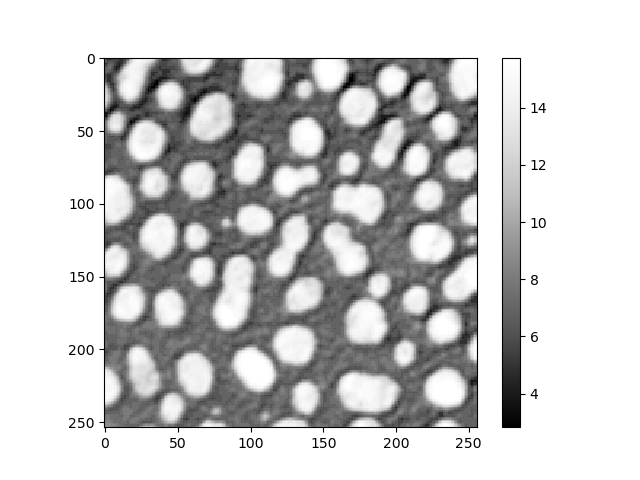
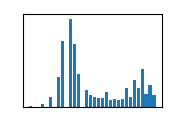

In [3]:
blurred = cle.hamdaan(image)
blurred

Hello World


cl.OCLArray([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
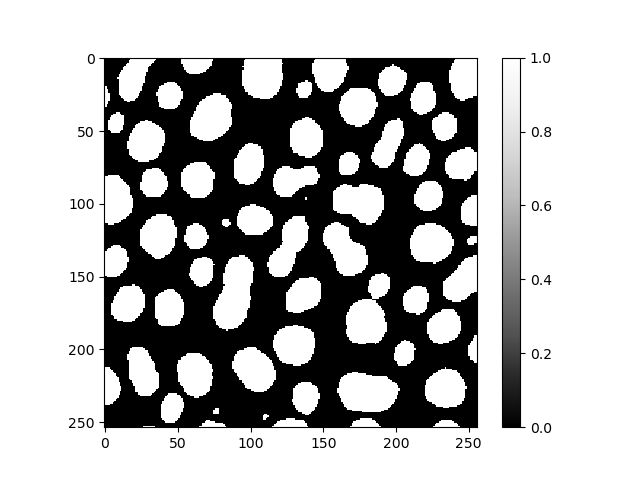
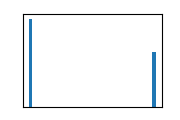

In [4]:
binary = cle.threshold_otsu(blurred)
binary

cl.OCLArray([[ 0,  0,  0, ..., 62, 62, 62],
       [ 0,  0,  0, ..., 62, 62, 62],
       [ 0,  0,  0, ..., 62, 62, 62],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint32)
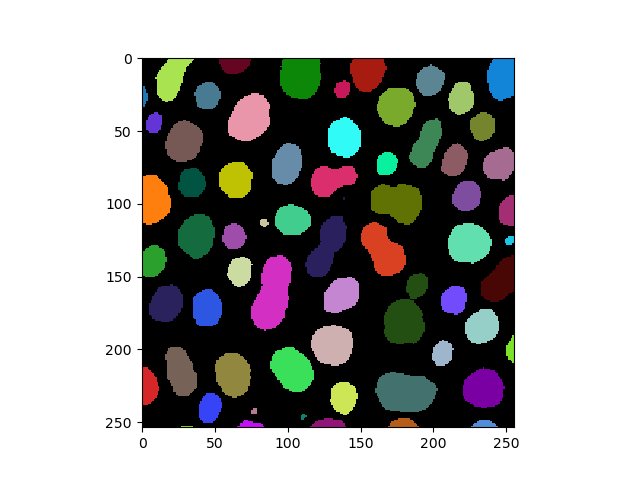

In [5]:
labeled = cle.connected_components_labeling_box(binary)
labeled

In [6]:
# The maximium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 65.0


## Addendum: Remove labels on edges
In case the size of the objects is relevant, one should exclude the object which were not fully imaged and thus, touch the image border.

cl.OCLArray([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
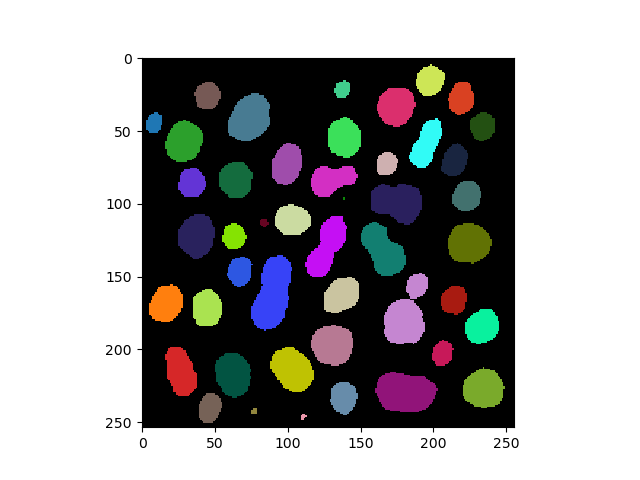

In [7]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)
labels_excl_edges